Human Activity Recognition (HAR) model

In [1]:
import numpy as np

# Load raw sensor data
X_train = np.loadtxt("X_train.txt")
X_test = np.loadtxt("X_test.txt")

# Check shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (7352, 561)
X_test shape: (2947, 561)


In [2]:
np.save("X_train.npy", X_train)
np.save("X_test.npy", X_test)

Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, Dense, Flatten, Dropout, MaxPooling1D
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import tsfel

Load the Dataset

In [4]:
# Load Data
X_train = np.load("X_train.npy")
X_test = np.load("X_test.npy")
y_train = np.loadtxt("y_train.txt").astype(int)
y_test = np.loadtxt("y_test.txt").astype(int)

# Reshape for CNN/LSTM
X_train_dl = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_dl = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_train -= 1  # Convert labels from 1-based to 0-based
y_test -= 1

LSTM Model

In [16]:
lstm_model = Sequential(
    [
        LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(32),
        Dense(32, activation="relu"),
        Dense(len(np.unique(y_train)), activation="softmax"),
    ]
)

lstm_model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
history_lstm = lstm_model.fit(
    X_train_dl, y_train, epochs=10, batch_size=32, validation_data=(X_test_dl, y_test)
)
# Accuracy
acc_lstm = lstm_model.evaluate(X_test_dl, y_test, verbose=0)[1]

c:\Users\srishti\anaconda3\envs\MachineLearning\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 75s 302ms/step - accuracy: 0.2754 - loss: 1.6350 - val_accuracy: 0.3563 - val_loss: 1.3001
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 80s 349ms/step - accuracy: 0.3633 - loss: 1.1901 - val_accuracy: 0.4723 - val_loss: 1.0534
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 125s 546ms/step - accuracy: 0.4652 - loss: 1.0416 - val_accuracy: 0.4618 - val_loss: 1.1115
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 96s 418ms/step - accuracy: 0.4984 - loss: 0.9903 - val_accuracy: 0.4734 - val_loss: 1.0681
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 107s 465ms/step - accuracy: 0.5184 - loss: 0.9599 - val_accuracy: 0.5063 - val_loss: 1.0235
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 94s 411ms/step - accuracy: 0.5391 - loss: 0.9521 - val_accuracy: 0.5263 - val_loss: 0.9766
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 109s 476ms/step - accuracy: 0.5564 - loss: 0.8993 - val_accuracy: 0.5243 - val_loss: 0.9967
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 83s 362ms/step - accuracy: 0.5992 - loss

CNN Model

In [17]:
cnn_model = Sequential(
    [
        Conv1D(64, kernel_size=3, activation="relu", input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(2),
        Conv1D(32, kernel_size=3, activation="relu"),
        Flatten(),
        Dense(32, activation="relu"),
        Dense(len(np.unique(y_train)), activation="softmax"),
    ]
)

cnn_model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
history_cnn = cnn_model.fit(
    X_train_dl, y_train, epochs=10, batch_size=32, validation_data=(X_test_dl, y_test)
)
# Accuracy
acc_cnn = cnn_model.evaluate(X_test_dl, y_test, verbose=0)[1]

Epoch 1/10


c:\Users\srishti\anaconda3\envs\MachineLearning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7214 - loss: 0.7157 - val_accuracy: 0.9203 - val_loss: 0.2097
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9614 - loss: 0.0965 - val_accuracy: 0.9355 - val_loss: 0.1831
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9736 - loss: 0.0694 - val_accuracy: 0.9457 - val_loss: 0.1469
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9852 - loss: 0.0417 - val_accuracy: 0.9583 - val_loss: 0.1155
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9847 - loss: 0.0400 - val_accuracy: 0.9118 - val_loss: 0.2523
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9869 - loss: 0.0370 - val_accuracy: 0.9508 - val_loss: 0.1334
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9890 - loss: 0.0273 - val_accuracy: 0.9549 - val_loss: 0.1388
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9943 - loss: 0.0190 - val_accuracy: 0.9579 - val_

Using TSFEL to Extract Features

In [7]:
from joblib import Parallel, delayed

# Extract statistical & temporal features only
cfg = tsfel.get_features_by_domain(["statistical", "temporal", "spectral"])


# Function to extract and flatten features
def extract_features(row):
    features = tsfel.time_series_features_extractor(
        cfg, row, fs=50, window_size=None, verbose=0
    )
    return np.array(features).flatten()  # Convert (1, num_features) to (num_features,)


# Apply feature extraction row-wise with parallel processing
X_train_tsfel = np.array(
    Parallel(n_jobs=-1)(delayed(extract_features)(row) for row in X_train)
)
X_test_tsfel = np.array(
    Parallel(n_jobs=-1)(delayed(extract_features)(row) for row in X_test)
)

# Ensure correct shape
print(
    "Fixed X_train_tsfel shape:", X_train_tsfel.shape
)  # Expected: (7352, num_features)
print("Fixed X_test_tsfel shape:", X_test_tsfel.shape)  # Expected: (2947, num_features)

Fixed X_train_tsfel shape: (7352, 156)
Fixed X_test_tsfel shape: (2947, 156)


In [8]:
from sklearn.feature_selection import SelectKBest, f_classif

# Keep the top 100 most relevant features
selector = SelectKBest(score_func=f_classif, k=100)
X_train_selected = selector.fit_transform(X_train_tsfel, y_train)
X_test_selected = selector.transform(X_test_tsfel)

c:\Users\srishti\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [5 6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\srishti\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [9]:
# Ensure data types match
X_train_tsfel = np.array(X_train_tsfel)
X_test_tsfel = np.array(X_test_tsfel)

# Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_tsfel, y_train)  # Now should work
y_pred_rf = rf.predict(X_test_tsfel)

# Check Accuracy
from sklearn.metrics import accuracy_score

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8469630132337971


Random Forest Model

In [10]:
rf = RandomForestClassifier()
rf.fit(X_train_tsfel, y_train)
y_pred_rf = rf.predict(X_test_tsfel)
#Accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)

SVM

In [11]:
svm = SVC()
svm.fit(X_train_tsfel, y_train)
y_pred_svm = svm.predict(X_test_tsfel)
#Accuracy
acc_svm = accuracy_score(y_test, y_pred_svm)

Logistic Regression

In [12]:
lr = LogisticRegression()
lr.fit(X_train_tsfel, y_train)
y_pred_lr = lr.predict(X_test_tsfel)
#Accuracy
acc_lr = accuracy_score(y_test, y_pred_lr)

c:\Users\srishti\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results

In [21]:
results = pd.DataFrame(
    {
        "Model": ["LSTM", "CNN", "Random Forest", "SVM", "Logistic Regression"],
        "Accuracy": [acc_lstm, acc_cnn, acc_rf, acc_svm, acc_lr],
    }
)
print(results)

                 Model  Accuracy
0                 LSTM  0.807262
1                  CNN  0.961317
2        Random Forest  0.845266
3                  SVM  0.422124
4  Logistic Regression  0.739735


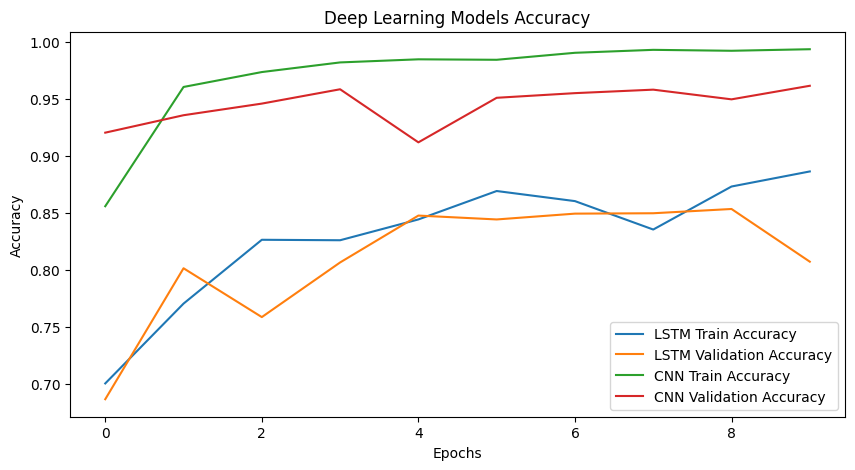

In [18]:
import matplotlib.pyplot as plt  # Plot training accuracy for deep learning models

plt.figure(figsize=(10, 5))
plt.plot(history_lstm.history["accuracy"], label="LSTM Train Accuracy")
plt.plot(history_lstm.history["val_accuracy"], label="LSTM Validation Accuracy")
plt.plot(history_cnn.history["accuracy"], label="CNN Train Accuracy")
plt.plot(history_cnn.history["val_accuracy"], label="CNN Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Deep Learning Models Accuracy")
plt.show()

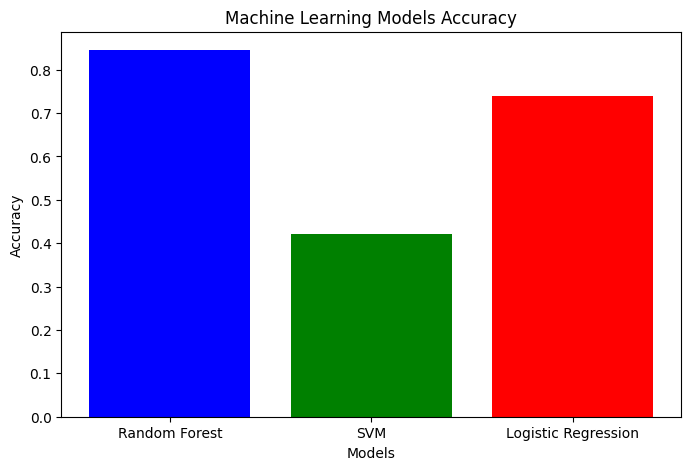

In [19]:
# Plot accuracy for machine learning models
plt.figure(figsize=(8, 5))
plt.bar(
    ["Random Forest", "SVM", "Logistic Regression"],
    [acc_rf, acc_svm, acc_lr],
    color=["blue", "green", "red"],
)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Machine Learning Models Accuracy")
plt.show()

Compare all Models

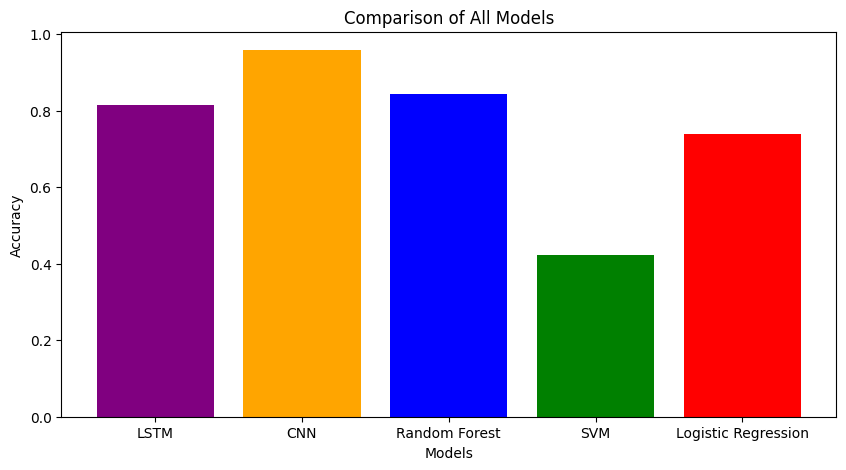

In [20]:
# Compare all models
plt.figure(figsize=(10, 5))
plt.bar(
    results["Model"],
    results["Accuracy"],
    color=["purple", "orange", "blue", "green", "red"],
)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of All Models")
plt.show()

In [23]:
# User input for prediction
def predict_activity():
    print("Enter sensor data (561 values, space-separated):")
    user_input = np.array(list(map(float, input().split()))).reshape(1, -1)
    user_features = tsfel.time_series_features_extractor(cfg, user_input, fs=50)
    user_features = np.array(user_features)

    pred_rf = rf.predict(user_features)[0]
    pred_svm = svm.predict(user_features)[0]
    pred_lr = lr.predict(user_features)[0]

    user_input_dl = user_input.reshape((1, X_train.shape[1], 1))
    pred_lstm = np.argmax(lstm_model.predict(user_input_dl))
    pred_cnn = np.argmax(cnn_model.predict(user_input_dl))

    print(
        f"Predictions:\nRandom Forest: {pred_rf}\nSVM: {pred_svm}\nLogistic Regression: {pred_lr}\nLSTM: {pred_lstm}\nCNN: {pred_cnn}"
    )